# Machine Learning COS-623 - Terceiro Trimestre de 2017
## Terceira e Quarta Listas de Exercı́cios (Graduação e Pós-Graduação)



In [ ]:
import numpy as np # manipulação de matrizes
import pandas as pd # Manipulação de datasets
import matplotlib.pyplot as plt # Para plotagem
import seaborn as sns # Coloração melhor nas plotagens
import scipy.stats as stats # Normalizações, cálculos de densidade de probabilidade, etc
import sklearn # Implementação de modelos preditivos e de classificação
import scipy 
%matplotlib inline

In [ ]:
## Lendo o dataset e separando os dados em 1000 dados de treino e 172 dados de teste
df = pd.read_csv("Dados-medicos.txt",sep=" ")
df = df.drop('Unnamed: 1', 1) ## removendo coluna gerado errôneamentod devido à formatação dos dados
df = df.drop('Unnamed: 2', 1) ## removendo coluna gerado errôneamentod devido à formatação dos dados

train = df.sample(frac = 0.85324232082,random_state=200)
test  = df.drop(train.index)

### Funções de apoio para primeira questão

Vamos definir uma função para executar o modelo de Regressão Linear, bem como analisar seu desempenho ao manipular as variáveis de entrada X e também plotar seu resultado final.

In [ ]:
from sklearn.linear_model import LinearRegression ## Modelo de regressão linear
from sklearn.preprocessing import PolynomialFeatures ## Geração de features para modelos

def do_rmse(y,y_predicted):
    return np.sqrt(np.mean((y - y_predicted) **2 ))

def negativeLogLikelihood(testDataset,variance,y,y_predicted):
    return -(len(testDataset)/2)*np.log(2*np.pi*variance) - (1/(2*variance))* np.sum((y - y_predicted) **2 )

def linear_regression(train,test,variables,target,polyDegree):
    ## Vamos criar X_ e test_ para ser datasets que possuem os valores das nossas variaveis x (carga) elevado a n

    data = train[variables]
    X_ = data.drop(target, axis = 1)

    testData = test[variables]
    test_ = testData.drop(target, axis = 1)

    polyDegree = 4
    poly = PolynomialFeatures(degree=polyDegree)

    X_ = poly.fit_transform(X_)

    test_ = poly.fit_transform(test_)

    X_ = pd.DataFrame(data=X_[0:,0:],index=X_[0:,0])

    test_ = pd.DataFrame(data=test_[0:,0:],index=test_[0:,0]) 

    ## Executando uma regressao polinomial para cada grau de polinomio <= polyDegree
    lm = LinearRegression()
    for i in range (1,polyDegree+1):
        X = X_.iloc[:,0:i+1]
        test_X = test_.iloc[:,0:i+1]
        lm.fit(X,data.VO2_medido_máximo)
        print(pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['features','w']))
        rmse = do_rmse(test.VO2_medido_máximo,lm.predict(test_X))
        print("O RMSE com polinômio de grau %i foi de %f" % (i,rmse)) 
        var = test[['VO2_medido_máximo']].var().values[0]
        nll = negativeLogLikelihood(test,var,test.VO2_medido_máximo,lm.predict(test_X))
        print("O NLL com polinômio de grau %i foi de %f \n" % (i,nll)) 

    # plots graph
    
    y = train[['VO2_medido_máximo']].values
    x = train[['Carga_Final']].values
    plt.scatter(x,y)
    plt.plot(x, lm.predict(poly.fit_transform(x)), color='blue', linewidth=3)
    plt.grid(True)
    plt.savefig("test.png")
    plt.show()
    

## Questão 1

### 1.1

In [ ]:
linear_regression(train,test,['Carga_Final','VO2_medido_máximo'],['VO2_medido_máximo'],4)

**Conclusão**:
Com o polinômio de grau 4 e apenas um parâmetro carga, fomos capazes de prever o VO2Max com um RMS error de 5.264564. Dado que a média do VO2Max é 29.3080070841, obtemos uma discrepância relativa média de aprox. 18%. Por isto, consideramos que nosso modelo de regressão linear não é satisfatório.

### Questão 1.2

In [ ]:
# Vamos criar trainFeatures e testFeatures e aplicar sobre eles as transformações dados pelas base functions
# E.g., Para duas features a e b, para um polinomio de grau 2, as funções base serão:
# [1, a, b, a^2, ab, b^2]

trainData = train[['Peso', 'Carga_Final','VO2_medido_máximo']]
trainFeatures = trainData.drop('VO2_medido_máximo', axis = 1)

testData = test[['Peso', 'Carga_Final','VO2_medido_máximo']]
testFeatures = testData.drop('VO2_medido_máximo', axis = 1)

polyDegree = 4

# executa para todos os graus de 1 até polyDegree
for i in range (1,polyDegree+1):
    poly = PolynomialFeatures(degree=i)
    X = poly.fit_transform(trainFeatures)
    test_X = poly.fit_transform(testFeatures)

    X = pd.DataFrame(data=X[0:,0:],index=X[0:,0])
    test_X = pd.DataFrame(data=test_X[0:,0:],index=test_X[0:,0]) 

    lm = LinearRegression()
    lm.fit(X,trainData.VO2_medido_máximo)
    print(pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['features','w']))
    rmse =  np.sqrt(np.mean( (test.VO2_medido_máximo - lm.predict(test_X) ) **2 ))
    print("O RMSE com polinômio de grau %i foi de %f" % (i,rmse)) 
    var = test[['VO2_medido_máximo']].var()
    nll = -(len(test)/2)*np.log(2*np.pi*var) - (1/(2*var))* np.sum( (test.VO2_medido_máximo - lm.predict(test_X) ) **2 )
    print("O NLL com polinômio de grau %i foi de %f \n" % (i,nll)) 

**Conclusão**: Com o polinômio de grau 4 e com dois parâmetros, carga e peso, fomos capazes de prever o VO2Max com um RMS error de 3.536983. Dado que a média do VO2Max é 29.3080070841, obtemos uma discrepância relativa média de aprox. 12%. Por isto, ainda consideramos que nosso modelo de regressão linear não é satisfatório, porém melhora a previsão anterior.

### Questão 1.3

In [ ]:
# Identical solution as question 1.2, but including the new feature age
trainData = train[['IDADE', 'Peso', 'Carga_Final','VO2_medido_máximo']]
trainFeatures = trainData.drop('VO2_medido_máximo', axis = 1)

testData = test[['IDADE', 'Peso', 'Carga_Final','VO2_medido_máximo']]
testFeatures = testData.drop('VO2_medido_máximo', axis = 1)

polyDegree = 4

# executa para todos os graus de 1 até polyDegree
for i in range (1,polyDegree+1):
    poly = PolynomialFeatures(degree=i)
    X = poly.fit_transform(trainFeatures)
    test_X = poly.fit_transform(testFeatures)

    X = pd.DataFrame(data=X[0:,0:],index=X[0:,0])
    test_X = pd.DataFrame(data=test_X[0:,0:],index=test_X[0:,0]) 

    lm = LinearRegression()
    lm.fit(X,trainData.VO2_medido_máximo)
    print(pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['features','w']))
    rmse =  np.sqrt(np.mean( (test.VO2_medido_máximo - lm.predict(test_X) ) **2 ))
    print("O RMSE com polinômio de grau %i foi de %f" % (i,rmse)) 
    var = test[['VO2_medido_máximo']].var()
    nll = -(len(test)/2)*np.log(2*np.pi*var) - (1/(2*var))* np.sum( (test.VO2_medido_máximo - lm.predict(test_X) ) **2 )
    print("O NLL com polinômio de grau %i foi de %f \n" % (i,nll)) 

**Conclusão**: Com o polinômio de grau 4 e com três parâmetros, carga e peso e idade, fomos capazes de prever o VO2Max com um RMS error de 3.536453, muito próximo da previsão anterior, mantendo a discrepância relativa anterior de aprox. 12%. Por isto, consideramos que nosso modelo de regressão linear não é satisfatório e a inclusão da idade não mudou a previsão do VO2Max.

### 1.4

In [ ]:
def acsm_formula(w,peso):
    return round((w*11.4+260+peso*3.5)/peso,3)

for i in range(len(test)):
    acsm.append(acsm_formula(test.Carga_Final.values[i],
                            test.Peso.values[i]))
acsm_rmse = do_rmse(test[['VO2_medido_máximo']].values,acsm)
acsm_rmse

**Conclusão**
Através da regressão linear na questão 1.2 obtivemos um RMSE = 3.536983, enquanto a fórmula do American College of Sports
Medicine obteve RMSE = 12.99829652090186, portanto podemos afirmar que
o desempenho de nossa regressão foi superior.

Ao adicionar aos parâmentros a idade, a regressão obteve uma melhora desprezível, diminuindo o RMSE em 0.0002%.

## Questao 2

### 2.1 

Referências:

- https://en.wikipedia.org/wiki/Multivariate_normal_distribution
- https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d

In [ ]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros da Gaussiana
my_data = train[['Carga_Final','VO2_medido_máximo']]
cov = my_data.cov().as_matrix()

mean_carga = train[['Carga_Final']].mean().values[0]
mean_vo2 = train[['VO2_medido_máximo']].mean().values[0]

## Criação de Grid para plotagem da Gaussiana multivariada 

x = np.linspace(train[['Carga_Final']].min(),train[['Carga_Final']].max(),500)
y = np.linspace(train[['VO2_medido_máximo']].min(),train[['VO2_medido_máximo']].max(),500)

X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mean_carga, mean_vo2],cov)

# Plotagem 3D

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('Carga_Final')
ax.set_ylabel('VO2_medido_máximo')
ax.set_zlabel('Densidade de Probabilidade')
plt.show()

### 2.2

Dado que a variável *V02* é contínua, a maneira mais adequada para resolver esse problema é primeiro integrando nossa Gaussiana no eixo do **Peso** e da **Carga** de acordo com os valores dados, depois definindo faixas de intervalo em V02 e integrando  para encontrar qual obtém maior probabilidade.

Devido a limitações de capacidade de processamento, neste trabalho nós retornaremos apenas uma aproximação do valor mais provável de VO2, sem a distribuição de probabilidade dos demais valores.

In [ ]:
## Cria um array com os valores que seriam previstos pela formula da American College of Sports and Medicine nos dados de teste
acsm = []

def acsm_formula(w,peso):
    return round((w*11.4+260+peso*3.5)/peso,3)

for i in range(len(test)):
    acsm.append(acsm_formula(test.Carga_Final.values[i],
                            test.Peso.values[i]))
acsm_rmse = do_rmse(test[['VO2_medido_máximo']].values,acsm)
acsm_rmse

In [ ]:
def estimate_prob(n):
    predict_v02 = []
    for j in range(len(test)):
        max_prob = 0 
        max_value = 0
        values = np.linspace(test[['VO2_medido_máximo']].min(),test[['VO2_medido_máximo']].max(),10000)
        for i in values:
            if(n==2):
                vo2 = rv2.pdf([test.Carga_Final[0],test.Peso[0],i])
            if(n==3):
                vo2 = rv2.pdf([test.Carga_Final[0],test.Peso[0],test.IDADE[0],i])
            if(vo2 > max_prob):
                max_prob = vo2
                max_value = i
        predict_v02.append(i)
    return predict_v02


In [ ]:
mean_peso = train[['Peso']].mean().values[0]

my_data = train[['Carga_Final','VO2_medido_máximo','Peso']]
cov = my_data.cov().as_matrix()
mu = [mean_carga,mean_peso,mean_vo2]
rv2 = multivariate_normal(mu, cov)

sample_values =  [[70,94.1],[260,70],[220,100]]


for j in range(len(sample_values)):
    probs = []
    pv = []
    max_prob = 0 
    max_value = 0
    values = np.linspace(test[['VO2_medido_máximo']].min(),test[['VO2_medido_máximo']].max(),10000)
    for i in values:
        vo2 = rv2.pdf([sample_values[j][0],sample_values[j][1],i])
        probs.append(vo2)
        pv.append(i)
        if(vo2 > max_prob):
            max_prob = vo2
            max_value = i 
    print(("O valor de Vo2 mais provável para o peso %s e a carga %s é: %s e o valor previsto pela ACMS é de %s") %
          (sample_values[j][0],
           sample_values[j][1],
           round(max_value,3),
           acsm_formula(sample_values[j][0],sample_values[j][1])))


predict_v02 = estimate_prob(2)


result_rmse = do_rmse(test[['VO2_medido_máximo']].values,predict_v02)
result_rmse

De modo a mostrar que esse método, mesmo que simplista, consegue estimar o resultado de forma razoável, basta plotarmos como exemplo o gráfico de distribuição de probabilidades para os valores de de carga e peso [220,100]. Vemos que o ponto que previmos *(15.095)* está exatamente no máximo global

In [ ]:
plt.plot(pv, probs)

O RMSE da fórmula do *American College of Sports Medicine* alcançou um RMSE aproximadamente 80% menor do que o encontrado pelo nosso modelo. Como não sabemos como a fórmula foi produzida, podemos especular que parte desse desempenho melhor se deve ao fato da fórmula do ACSM ter sido criado com base em mais dados.

### 2.3

In [ ]:
mean_idade = train[['IDADE']].mean().values[0]

my_data = train[['Carga_Final','VO2_medido_máximo','Peso','IDADE']]
cov = my_data.cov().as_matrix()

rv2 = multivariate_normal([mean_carga,mean_peso,mean_idade,mean_vo2], cov)

sample_values =  [[70,94.1,18],[260,70,30],[220,100,60]]

for j in range(len(sample_values)):
    probs = []
    pv = []
    max_prob = 0 
    max_value = 0
    values = np.linspace(train[['VO2_medido_máximo']].min(),train[['VO2_medido_máximo']].max(),10000)
    for i in values:
        vo2 = rv2.pdf([sample_values[j][0],sample_values[j][1],sample_values[j][2],i])
        probs.append(vo2)
        pv.append(i)
        if(vo2 > max_prob):
            max_prob = vo2
            max_value = i 
    print(("O valor de Vo2 mais provável para o peso %s,a carga %s e idade %s é: %s e o valor previsto pela ACMS é de %s") %
          (sample_values[j][0],
           sample_values[j][1],
           sample_values[j][2],
           round(max_value,3),
           acsm_formula(sample_values[j][0],sample_values[j][1])))
    
predict_v02 = estimate_prob(3)

result_rmse = do_rmse(test[['VO2_medido_máximo']].values,predict_v02)
result_rmse

In [ ]:
plt.plot(pv, probs)

Notamos que não houve diferença significativa no modelo ao inserir a idade. a fórmula do ACSM permaneceu com um RMSE por volta de 80% mais baixo

## Questão 3
### 3.1

In [ ]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

trainingGroups = {}
trainingGroups['18_40'] = train.loc[(train['IDADE'] > 18) & (train['IDADE'] <= 40)][['Carga_Final','VO2_medido_máximo']]
trainingGroups['40_60'] = train.loc[(train['IDADE'] > 40) & (train['IDADE'] <= 60)][['Carga_Final','VO2_medido_máximo']]
trainingGroups['60'] = train.loc[(train['IDADE'] >= 60)][['Carga_Final','VO2_medido_máximo']]

groups = ['18_40', '40_60', '60']

# Parâmetros das Gaussianas
params = {}
for group in groups:
    params[group] = {}
    params[group]['cov'] = trainingGroups[group].cov().as_matrix()
    params[group]['mean_carga'] = trainingGroups[group][['Carga_Final']].mean().values[0]
    params[group]['mean_vo2'] = trainingGroups[group][['VO2_medido_máximo']].mean().values[0]
    
## Criação de Grid para plotagem da Gaussiana multivariada 
x = np.linspace(train[['Carga_Final']].min(),train[['Carga_Final']].max(),500)
y = np.linspace(train[['VO2_medido_máximo']].min(),train[['VO2_medido_máximo']].max(),500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# Plotagem 3D
for group in groups:
    print(group)
    rv = multivariate_normal([params[group]['mean_carga'], params[group]['mean_vo2']], params[group]['cov'])
    fig = plt.figure(figsize=(9, 9))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    ax.set_xlabel('Carga_Final')
    ax.set_ylabel('VO2_medido_máximo')
    ax.set_zlabel('Densidade de Probabilidade')
    plt.show()

Podemos perceber pelos plots dos diferentes modelos que o pico a Gaussiana vai se aproximando da origem (0, 0) com o aumento da idade.

### Questão 3.2
Onde $\boldsymbol{x} = [x_1, x_2, .., x_D]$
, pela independência entre as features assumida no modelo Naive Bayes, podemos calcular a probabilidade da classe como:
$$ p(h = c \mid \boldsymbol{x}, \theta) \propto p(h=c \mid \theta) \prod_{i=1}^{D} p(x_i \mid h=c, \theta)  $$
$$ posterior \propto prior * likelihood $$
A prior $p(h=c \mid \theta)$ que pode ser gerada como o número de amostras pertencentes a classe $c$ dividido pelo número total de amostras.

A likelihood, portanto, é baseado no modelo Gaussiano, já presente no enunciado da questão.

### Questão 3.3
A suposição básica do Naive Bayes é assumir que as features sejam independêntes entre si, o que não é
necessariamente assumido no modelo de Gaussiana Multivariada.

### Questão 3.4
Temos que a likelihood é: 
$$\mathcal{L}(\theta \mid \boldsymbol{x}, y=c) = P(\boldsymbol{x}, y=c \mid \theta) \propto P(\boldsymbol{x} \mid y=c) P(y=c \mid \theta)$$
Pela independência das features:
$$\mathcal{L}(\theta \mid \boldsymbol{x}, y=c) = P(y=c \mid \theta) \prod_{i=1}^{D} P(x_i \mid y=c, \theta)$$
Aplicando log:
$$log \mathcal{L}(\theta \mid \boldsymbol{x}, y=c) = log(P(y=c \mid \theta)) + \sum_{i=1}^{D} log(P(x_i \mid y=c, \theta))$$
Para obter os parâmetros otimizados, derivamos em relação a cada parâmetro e igualamos a 0. Como temos um Naive Bayes, os resultados serão:

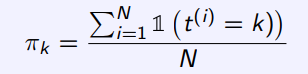

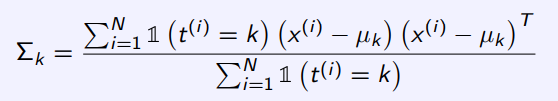

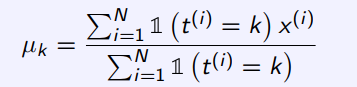

Onde k representa o parâmetro da késima classe.

Já calculamos os parâmetros $ \mu_k, \Sigma_k$ na questão 3.1, somente restando $ \pi_k $:

In [ ]:
trainingGroups = {}
trainingGroups['18_40'] = train.loc[(train['IDADE'] > 18) & (train['IDADE'] <= 40)][['Carga_Final','VO2_medido_máximo']]
trainingGroups['40_60'] = train.loc[(train['IDADE'] > 40) & (train['IDADE'] <= 60)][['Carga_Final','VO2_medido_máximo']]
trainingGroups['60'] = train.loc[(train['IDADE'] >= 60)][['Carga_Final','VO2_medido_máximo']]

totalNumberOfSamples = 1000
for group in groups:
    params[group]['pi'] = len(trainingGroups[group])/totalNumberOfSamples
    print('O pi, "representatividade", do grupo ' + group + ' é ' + str(params[group]['pi']))

## Questão 4


In [ ]:
from sklearn import mixture

df = train[['IDADE','Peso','Carga_Final','VO2_medido_máximo']]

gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(np.array(df))
labels = gmm.predict(np.array(test))

O gráfico abaixo mostra a relação entre Idade e Peso, sinalizando com cores diferentes pontos que forama tribuídos para gaussianas distintas.

In [ ]:
plt.scatter(np.array(test)[:, 0], np.array(test)[:, 1], c=labels, s=40, cmap='viridis');
plt.xlabel("IDADE")
plt.ylabel("Peso")
plt.show()

### 4.2


Para encontrar os parâmetros do modelo é utilizado o algoritmo de **Expectation Maximixation**. Esse algoritmo funciona através das seguintes etapas:
s
1. **Passo 1:** Inicializa a mistura de gaussianas com parâmetros ¨chutados¨ *(variâncias e médias)*
2. **Passo 2:** *(E-Step)* Estima os valores das probabilidades a priori (pi) com base nos parâmetros atuais
3. **Passo 3:** *(M-Step)* Estima novos parâmetros para o modelo com base nas probabilidades a priori e nos parâmetros atuais. São estimadas então novas médias e variâncias para as Gaussianas

Esse algoritmo então itera até convergir para um mínimo local, sendo que em cada uma de suas iterações o log likelihood aumenta.

A equação principal utilizada é:

$$ \begin{equation}
\begin{split}
-\Sigma^N_{n=1}\frac{\pi_k\mathcal{N}(x_n|\mu_k,\Sigma_k)}{\Sigma^K_{j=1}\pi_j
\mathcal{N}(x_n|\mu_j,\Sigma_j)}\Sigma_k(x_n-\mu_k) =&& 0\\
\end{split}
\end{equation}$$
